In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING']="1"
import torch
print(torch.__version__)
print(torch.cuda.is_available())
from torch.utils.data import DataLoader
from my_module import StratifiedSplit, SoccerEventClassifier,plot_model,train_model
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder

2.5.1+cu121
True


In [2]:
#root dir
root_dir='Train'
base_transform_train= transforms.Compose([
      transforms.Resize((224,224)),
      transforms.RandomHorizontalFlip(),
      transforms.RandomHorizontalFlip(),
      transforms.ColorJitter(brightness=.3,contrast=.3),
      transforms.RandomErasing(p=.5,scale=(.02,.1)),
      transforms.ToTensor(),
      transforms.Normalize([.485,.456,.406],[.229,.224,.225])
     ])
transform_paper=transforms.Compose([
            transforms.Resize((224, 224)),  # Scale
            transforms.RandomRotation(10),  # Rotate
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Shift
            transforms.RandomHorizontalFlip(),  # Flip
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
base_transform_valid= transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor(),
      transforms.Normalize([.485,.456,.406],[.229,.224,.225])
     ])
batch_size=16
num_epochs=20
learning_rate=1e-4
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#full Dataset
full_dataset= ImageFolder(root_dir)
stratified_split= StratifiedSplit(test_size=.1)
train_dataset,val_dataset= stratified_split(full_dataset)
#Applying transformations
train_dataset.dataset.transform=base_transform_train
val_dataset.dataset.transform= base_transform_valid

In [4]:
#Loaders
train_loader= DataLoader(train_dataset,
                         #num_workers=2,
                         pin_memory=True,
                         batch_size=16,
                         shuffle=True)
val_loader= DataLoader(val_dataset,
                       #num_workers=2,
                       pin_memory=True,
                       batch_size=32,
                       shuffle=False)


1/20 |Train Loss:0.2936 | Valid Loss 0.0540 |Train acc: 0.9138 | Valid Acc 0.9853 | LR:1.00e-04 |Time:30m 51s
2/20 |Train Loss:0.0791 | Valid Loss 0.0354 |Train acc: 0.9771 | Valid Acc 0.9915 | LR:1.00e-04 |Time:28m 9s
3/20 |Train Loss:0.0488 | Valid Loss 0.0476 |Train acc: 0.9861 | Valid Acc 0.9853 | LR:1.00e-04 |Time:27m 49s
4/20 |Train Loss:0.0375 | Valid Loss 0.0430 |Train acc: 0.9890 | Valid Acc 0.9873 | LR:1.00e-04 |Time:27m 47s
5/20 |Train Loss:0.0291 | Valid Loss 0.0390 |Train acc: 0.9919 | Valid Acc 0.9909 | LR:5.00e-05 |Time:27m 18s
6/20 |Train Loss:0.0152 | Valid Loss 0.0236 |Train acc: 0.9954 | Valid Acc 0.9933 | LR:5.00e-05 |Time:27m 3s
7/20 |Train Loss:0.0125 | Valid Loss 0.0309 |Train acc: 0.9961 | Valid Acc 0.9925 | LR:5.00e-05 |Time:26m 50s
8/20 |Train Loss:0.0096 | Valid Loss 0.0301 |Train acc: 0.9972 | Valid Acc 0.9933 | LR:5.00e-05 |Time:26m 41s
9/20 |Train Loss:0.0100 | Valid Loss 0.0303 |Train acc: 0.9973 | Valid Acc 0.9937 | LR:5.00e-05 |Time:26m 44s
10/20 |Train

ValueError: num must be an integer with 1 <= num <= 2, not 3

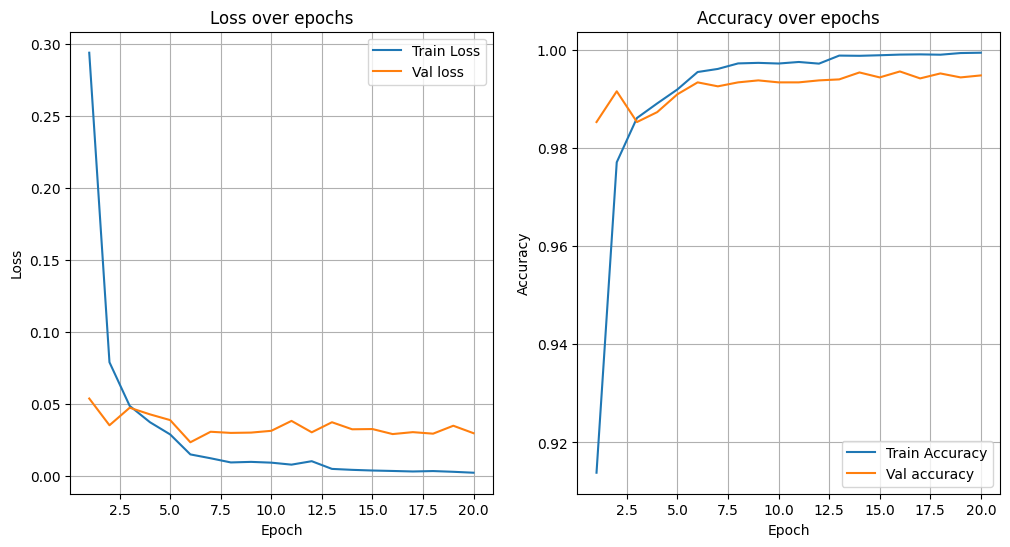

In [ ]:
model= SoccerEventClassifier().to(device)
torch.cuda.empty_cache()

if __name__=="__main__":
  metrics= train_model(
    model=model,
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_epochs=num_epochs,
    device=device,
    train_loader=train_loader,
    val_loader=val_loader,
    clip_grad=None,
    use_mixup=False
  )
  plot_model(metrics)

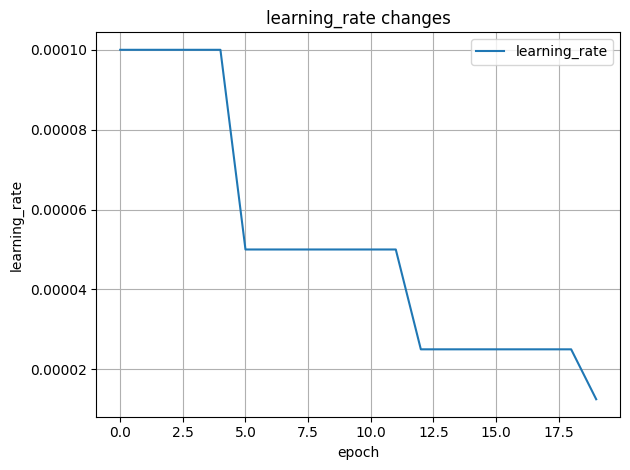

In [8]:
import matplotlib.pyplot as plt

plt.plot(list(range(num_epochs)),metrics['lrs'],label='learning_rate')
plt.xlabel('epoch')
plt.ylabel('learning_rate')
plt.title('learning_rate changes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()